## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Remount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Check Directory
!ls "/content/drive/My Drive/Multimodal ML (11-777)/stvqa_data"

source.gdoc		   test_task1_imgs.tar	test_task3_imgs.tar
stvqa_training_images.tar  test_task2_imgs.tar


## Install YOLO and its dependencies 
(Referenced: https://medium.com/@artinte7/real-time-object-detection-using-yolo-upon-google-colab-in-5-minutes-fd65a4903df5)

Make sure to select GPU under Runtime -> Change runtime type

In [ ]:
# add path to CUDA and clone Git repo
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 14333 (delta 0), reused 0 (delta 0), pack-reused 14330
Receiving objects: 100% (14333/14333), 12.88 MiB | 4.62 MiB/s, done.
Resolving deltas: 100% (9773/9773), done.


In [ ]:
# install C compiler and links to CUDA dir
!apt install gcc-5 g++-5 -y
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc 
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cpp-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0 libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 6 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base amd64 5.5.0-12ubuntu1 [17.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libisl15 amd64 0.18-4 [548 kB]
Get:3 http://archi

In [ ]:
# Compile Darknet with GPU enabled and OpenCV support
%cd darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1424:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^
./src/image_opencv.cpp:1400:9: warning: unused variable ‘it_tb_res’ [-Wunused-variable]
     int it_tb

In [ ]:
# Get YOLO V3 Pretrained weights (Takes around 10 mins)
!wget https://pjreddie.com/media/files/yolov3.weights
!chmod a+x ./darknet

--2020-10-11 19:27:31--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights       58%[==========>         ] 139.29M   133KB/s    eta 9m 34s ^C


In [ ]:
# Test with sample image
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights data/dog.jpg

 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv   

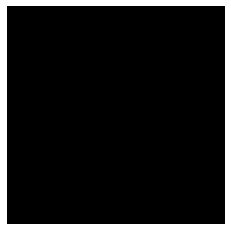

In [ ]:
# Visualize detected image
import cv2
import matplotlib.pyplot as plt
import os.path

fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = './predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)

In [ ]:
# Get coordinates
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights data/dog.jpg -ext_output

 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF


## Install Pytorch-YOLO

In [ ]:
%cd /content
!pwd

/content
/content


In [ ]:
!git clone https://github.com/eriklindernoren/PyTorch-YOLOv3
%cd PyTorch-YOLOv3/
!pip3 install -r requirements.txt

Cloning into 'PyTorch-YOLOv3'...
remote: Enumerating objects: 724, done.
remote: Total 724 (delta 0), reused 0 (delta 0), pack-reused 724
Receiving objects: 100% (724/724), 16.18 MiB | 5.65 MiB/s, done.
Resolving deltas: 100% (410/410), done.
/content/PyTorch-YOLOv3


In [ ]:
!pwd

/content/PyTorch-YOLOv3


In [ ]:
# Takes around 45 minutes
%cd weights/
!bash ./download_weights.sh

/content/PyTorch-YOLOv3/weights
--2020-10-11 20:16:01--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   163KB/s    in 25m 41s 

2020-10-11 20:41:44 (157 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2020-10-11 20:41:44--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M   131KB/s    in 3m 35s  

2020-10-11 20:45:21 (161 KB/s) - ‘yolov3-tiny.weights’ sa

## Unzip ST-VQA Training Dataset

In [ ]:
%cd /content
!tar -xvf "/content/gdrive/My Drive/Multimodal ML (11-777)/stvqa_data/stvqa_training_images.tar"

Streaming output truncated to the last 5000 lines.
coco-text/COCO_train2014_000000421341.jpg
imageNet/n02783161_11991.JPEG
imageNet/n07248320_101788.JPEG
imageNet/n02799071_34797.JPEG
imageNet/n03729826_4215.JPEG
VisualGenome/1/2316440.jpg
coco-text/COCO_train2014_000000127268.jpg
imageNet/n02172182_4833.JPEG
VisualGenome/1/2323169.jpg
VisualGenome/2/2415897.jpg
VisualGenome/1/2337520.jpg
VisualGenome/1/2319059.jpg
VisualGenome/1/2339483.jpg
IIIT_text/2411.jpg
coco-text/COCO_train2014_000000007220.jpg
coco-text/COCO_train2014_000000028103.jpg
imageNet/n03649909_12964.JPEG
coco-text/COCO_train2014_000000202990.jpg
VisualGenome/1/2357215.jpg
imageNet/n04591157_1476.JPEG
coco-text/COCO_train2014_000000105733.jpg
VisualGenome/1/2338634.jpg
coco-text/COCO_train2014_000000107838.jpg
VisualGenome/1/2322375.jpg
VisualGenome/1/2356027.jpg
imageNet/n02917067_18193.JPEG
coco-text/COCO_train2014_000000124914.jpg
imageNet/n02669723_468.JPEG
coco-text/COCO_train2014_000000087403.jpg
VisualGenome/1/2

In [ ]:
import requests
url = 'http://datasets.cvc.uab.es/rrc/train_task_3.json'
r = requests.get(url)

train = r.json()
train['data'][0]

{'answers': ['Susan'],
 'dataset': 'coco-text',
 'file_name': 'COCO_train2014_000000347021.jpg',
 'file_path': 'coco-text/COCO_train2014_000000347021.jpg',
 'image_height': 256,
 'image_width': 256,
 'question': 'What is the book authors first name?',
 'question_id': 0,
 'question_tokens': ['What',
  'is',
  'the',
  'book',
  'authors',
  'first',
  'name',
  '?'],
 'set_name': 'train'}

In [ ]:
# Check Image
from PIL import Image
import torchvision.transforms as transforms

test = Image.open("coco-text/COCO_train2014_000000319120.jpg")
testTensor = transforms.ToTensor()(test)
testTensor.shape

torch.Size([3, 256, 256])

## Test With One Image

In [ ]:
%cd /content/PyTorch-YOLOv3/
!pwd

/content/PyTorch-YOLOv3
/content/PyTorch-YOLOv3


In [ ]:
from __future__ import division

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np

from utils.parse_config import *
from utils.utils import build_targets, to_cpu, non_max_suppression

import matplotlib.pyplot as plt
import matplotlib.patches as patches

class DarknetTest(nn.Module):
    """YOLOv3 object detection model"""

    def __init__(self, config_path, img_size=416):
        super(DarknetTest, self).__init__()
        self.module_defs = parse_model_config(config_path)
        self.hyperparams, self.module_list = create_modules(self.module_defs)
        self.yolo_layers = [layer[0] for layer in self.module_list if hasattr(layer[0], "metrics")]
        self.img_size = img_size
        self.seen = 0
        self.header_info = np.array([0, 0, 0, self.seen, 0], dtype=np.int32)

    def forward(self, x, targets=None):
      img_dim = x.shape[2]
      loss = 0
      layer_outputs, yolo_outputs = [], []
      intermediate_features = []
      for i, (module_def, module) in enumerate(zip(self.module_defs, self.module_list)):
          if module_def["type"] in ["convolutional", "upsample", "maxpool"]:
              x = module(x)
              # Extract features at some layers
              if i in [105]:
                  intermediate_features.append(x)
          elif module_def["type"] == "route":
              x = torch.cat([layer_outputs[int(layer_i)] for layer_i in module_def["layers"].split(",")], 1)
          elif module_def["type"] == "shortcut":
              layer_i = int(module_def["from"])
              x = layer_outputs[-1] + layer_outputs[layer_i]
          elif module_def["type"] == "yolo":
              x, layer_loss = module[0](x, targets, img_dim)
              loss += layer_loss
              yolo_outputs.append(x)
          layer_outputs.append(x)
      yolo_outputs = to_cpu(torch.cat(yolo_outputs, 1))
      return (yolo_outputs, intermediate_features) if targets is None else (loss, yolo_outputs, intermediate_features)

    def load_darknet_weights(self, weights_path):
        """Parses and loads the weights stored in 'weights_path'"""

        # Open the weights file
        with open(weights_path, "rb") as f:
            header = np.fromfile(f, dtype=np.int32, count=5)  # First five are header values
            self.header_info = header  # Needed to write header when saving weights
            self.seen = header[3]  # number of images seen during training
            weights = np.fromfile(f, dtype=np.float32)  # The rest are weights

        # Establish cutoff for loading backbone weights
        cutoff = None
        if "darknet53.conv.74" in weights_path:
            cutoff = 75

        ptr = 0
        for i, (module_def, module) in enumerate(zip(self.module_defs, self.module_list)):
            if i == cutoff:
                break
            if module_def["type"] == "convolutional":
                conv_layer = module[0]
                if module_def["batch_normalize"]:
                    # Load BN bias, weights, running mean and running variance
                    bn_layer = module[1]
                    num_b = bn_layer.bias.numel()  # Number of biases
                    # Bias
                    bn_b = torch.from_numpy(weights[ptr : ptr + num_b]).view_as(bn_layer.bias)
                    bn_layer.bias.data.copy_(bn_b)
                    ptr += num_b
                    # Weight
                    bn_w = torch.from_numpy(weights[ptr : ptr + num_b]).view_as(bn_layer.weight)
                    bn_layer.weight.data.copy_(bn_w)
                    ptr += num_b
                    # Running Mean
                    bn_rm = torch.from_numpy(weights[ptr : ptr + num_b]).view_as(bn_layer.running_mean)
                    bn_layer.running_mean.data.copy_(bn_rm)
                    ptr += num_b
                    # Running Var
                    bn_rv = torch.from_numpy(weights[ptr : ptr + num_b]).view_as(bn_layer.running_var)
                    bn_layer.running_var.data.copy_(bn_rv)
                    ptr += num_b
                else:
                    # Load conv. bias
                    num_b = conv_layer.bias.numel()
                    conv_b = torch.from_numpy(weights[ptr : ptr + num_b]).view_as(conv_layer.bias)
                    conv_layer.bias.data.copy_(conv_b)
                    ptr += num_b
                # Load conv. weights
                num_w = conv_layer.weight.numel()
                conv_w = torch.from_numpy(weights[ptr : ptr + num_w]).view_as(conv_layer.weight)
                conv_layer.weight.data.copy_(conv_w)
                ptr += num_w

    def save_darknet_weights(self, path, cutoff=-1):
        """
            @:param path    - path of the new weights file
            @:param cutoff  - save layers between 0 and cutoff (cutoff = -1 -> all are saved)
        """
        fp = open(path, "wb")
        self.header_info[3] = self.seen
        self.header_info.tofile(fp)

        # Iterate through layers
        for i, (module_def, module) in enumerate(zip(self.module_defs[:cutoff], self.module_list[:cutoff])):
            if module_def["type"] == "convolutional":
                conv_layer = module[0]
                # If batch norm, load bn first
                if module_def["batch_normalize"]:
                    bn_layer = module[1]
                    bn_layer.bias.data.cpu().numpy().tofile(fp)
                    bn_layer.weight.data.cpu().numpy().tofile(fp)
                    bn_layer.running_mean.data.cpu().numpy().tofile(fp)
                    bn_layer.running_var.data.cpu().numpy().tofile(fp)
                # Load conv bias
                else:
                    conv_layer.bias.data.cpu().numpy().tofile(fp)
                # Load conv weights
                conv_layer.weight.data.cpu().numpy().tofile(fp)

        fp.close()


In [ ]:
import torchvision.transforms as transforms
TARGET_IMAGE_SIZE = [416, 416]
CHANNEL_MEAN = [0.485, 0.456, 0.406]
CHANNEL_STD = [0.229, 0.224, 0.225]
data_transforms = transforms.Compose(
    [
        transforms.Resize(TARGET_IMAGE_SIZE),
        transforms.ToTensor(),
        transforms.Normalize(CHANNEL_MEAN, CHANNEL_STD),
    ]
)

In [ ]:
from __future__ import division

from models import *
from utils.utils import *
from utils.datasets import *

import os
import sys
import time
import datetime
import argparse

from PIL import Image

import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.ticker import NullLocator

def detect():

  features = {}
  features_info = {}


  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  os.makedirs("output", exist_ok=True)
  # Set up model
  model = DarknetTest("config/yolov3.cfg", img_size=416).to(device)
  model.load_darknet_weights("weights/yolov3.weights")
  model.eval()  # Set in evaluation mode
  dataloader = DataLoader(
        ImageFolder("/content/coco-text", img_size=416),
        batch_size=1,
        shuffle=False,
        num_workers=1,
    )
  
  classes = load_classes("data/coco.names")

  Tensor = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
  imgs = []  # Stores image paths
  img_detections = []  # Stores detections for each image index

  print("\nPerforming object detection:")
  prev_time = time.time()
  # for batch_i, (img_paths, input_imgs) in enumerate(dataloader):
  for batch_i in range(100):
      
      img_paths = "/content/"+train['data'][batch_i]['file_path']
      
      input_imgs = Image.open(img_paths).convert("RGB")
      input_imgs = data_transforms(input_imgs).unsqueeze(0)

      # Configure input
      if input_imgs.shape[1] == 1:
        pad = torch.zeros(1, 2, 416, 416);
        input_imgs = torch.cat((input_imgs, pad), 1)
      input_imgs = Variable(input_imgs.type(Tensor))
        
      
      # Get detections
      with torch.no_grad():
        detections = model(input_imgs)
        image_feat = detections[1][0]
        detections = non_max_suppression(detections[0], 0.8, 0.4)

      # Log progress
      current_time = time.time()
      inference_time = datetime.timedelta(seconds=current_time - prev_time)
      prev_time = current_time
      print("\t+ Batch %d, Inference Time: %s" % (batch_i, inference_time))

      # Save image and detections
      imgs.append(img_paths)
      img_detections.extend(detections)
      
      features[batch_i] = image_feat.cpu().numpy()
      features_info[batch_i] = (img_paths, train['data'][batch_i]['answers'])
      torch.cuda.empty_cache()
      del image_feat

  # # Bounding-box colors
  # cmap = plt.get_cmap("tab20b")
  # colors = [cmap(i) for i in np.linspace(0, 1, 20)]

  # print("\nSaving images:")
  # # Iterate through images and save plot of detections

  # for img_i, (path, detections) in enumerate(zip(imgs, img_detections)):
  #     print(path)
  #     print("(%d) Image: '%s'" % (img_i, path))

  # #     # Create plot
  #     img = np.array(Image.open(path))
  # #     plt.figure()
  # #     fig, ax = plt.subplots(1)
  # #     ax.imshow(img)

  #     # Draw bounding boxes and labels of detections
  #     if detections is not None:
  #         # Rescale boxes to original image
  #         detections = rescale_boxes(detections, 416, img.shape[:2])
  #         unique_labels = detections[:, -1].cpu().unique()
  #         n_cls_preds = len(unique_labels)
  #         # bbox_colors = random.sample(colors, n_cls_preds)
  #         for x1, y1, x2, y2, conf, cls_conf, cls_pred in detections:

  #             print("\t+ Label: %s, Conf: %.5f" % (classes[int(cls_pred)], cls_conf.item()))
  #             classes_test=classes[int(cls_pred)]
  #             features[i] = image_feat.data.cpu().numpy()
  #             features_info[i] = (path, classes_test)
  #             box_w = x2 - x1
  #             box_h = y2 - y1

  #             color = bbox_colors[int(np.where(unique_labels == int(cls_pred))[0])]
  #             # Create a Rectangle patch
  #             bbox = patches.Rectangle((x1, y1), box_w, box_h, linewidth=2, edgecolor=color, facecolor="none")
  #             # Add the bbox to the plot
  #             ax.add_patch(bbox)
  #             # Add label
  #             plt.text(
  #                 x1,
  #                 y1,
  #                 s=classes[int(cls_pred)],
  #                 color="white",
  #                 verticalalignment="top",
  #                 bbox={"color": color, "pad": 0},
  #             )

  #     # Save generated image with detections
  #     plt.axis("off")
  #     plt.gca().xaxis.set_major_locator(NullLocator())
  #     plt.gca().yaxis.set_major_locator(NullLocator())
  #     filename = path.split("/")[-1].split(".")[0]
  #     plt.savefig(f"output/{filename}.png", bbox_inches="tight", pad_inches=0.0)
  #     plt.close()

  return features, features_info

In [ ]:
features, features_info = detect()
print(features[0].shape)


Performing object detection:
	+ Batch 0, Inference Time: 0:00:00.352082
	+ Batch 1, Inference Time: 0:00:00.044638
	+ Batch 2, Inference Time: 0:00:00.048619
	+ Batch 3, Inference Time: 0:00:00.058539
	+ Batch 4, Inference Time: 0:00:00.063008
	+ Batch 5, Inference Time: 0:00:00.065439
	+ Batch 6, Inference Time: 0:00:00.047315
	+ Batch 7, Inference Time: 0:00:00.048438
	+ Batch 8, Inference Time: 0:00:00.061336
	+ Batch 9, Inference Time: 0:00:00.045801
	+ Batch 10, Inference Time: 0:00:00.046637
	+ Batch 11, Inference Time: 0:00:00.044538
	+ Batch 12, Inference Time: 0:00:00.043224
	+ Batch 13, Inference Time: 0:00:00.055783
	+ Batch 14, Inference Time: 0:00:00.042017
	+ Batch 15, Inference Time: 0:00:00.061582
	+ Batch 16, Inference Time: 0:00:00.045691
	+ Batch 17, Inference Time: 0:00:00.041931
	+ Batch 18, Inference Time: 0:00:00.053424
	+ Batch 19, Inference Time: 0:00:00.046392
	+ Batch 20, Inference Time: 0:00:00.051038
	+ Batch 21, Inference Time: 0:00:00.049356
	+ Batch 22,

In [ ]:
import pandas as pd

data = {id: feat.flatten() for id, feat in features.items()}
df = pd.DataFrame.from_dict(data, orient='index')
df.shape

(100, 689520)

In [ ]:
colnames = {i:"x"+str(i) for i in range(df.shape[1])}
df.rename(columns=colnames, inplace=True)

In [ ]:
indices = set(df.index)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
scaler = StandardScaler()
scaler.fit(df)
X_scale = scaler.transform(df)
df_scale = pd.DataFrame(X_scale, columns=df.columns)
df_scale.head(n=20)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x689480,x689481,x689482,x689483,x689484,x689485,x689486,x689487,x689488,x689489,x689490,x689491,x689492,x689493,x689494,x689495,x689496,x689497,x689498,x689499,x689500,x689501,x689502,x689503,x689504,x689505,x689506,x689507,x689508,x689509,x689510,x689511,x689512,x689513,x689514,x689515,x689516,x689517,x689518,x689519
0,-1.488020,1.185212,1.000038,1.174731,1.552694,1.331981,2.514041,1.006411,0.843671,0.635656,1.223952,0.733751,0.837237,2.145995,0.730573,0.223718,1.292422,2.065257,0.903067,0.552306,1.465651,0.873638,0.185950,1.732364,1.332332,-1.355340,0.601392,0.846462,1.133183,1.377855,0.995367,1.299441,1.282522,1.478430,1.401964,1.212704,1.421171,1.292341,1.719947,1.190720,...,0.704127,0.404771,0.395020,0.242789,0.299132,0.327872,0.457754,0.176548,0.045439,-0.094480,-0.278968,-0.532775,-0.649905,-0.842041,-1.098419,-1.503342,-1.770345,-1.820688,-1.491407,-1.025921,-1.046799,-1.020127,-0.589384,0.097438,0.376538,0.503450,0.644710,0.790117,0.942404,1.131310,1.096394,0.722399,0.403328,0.168722,0.216162,0.240327,0.177055,0.135502,0.386614,0.840615
1,-1.488020,1.185212,1.000038,1.174731,1.552694,1.331981,2.514041,1.006411,0.843671,0.635656,1.223952,0.733751,0.837237,2.145995,0.730573,0.223718,1.292422,2.065257,0.903067,0.552306,1.465651,0.873638,0.185950,1.732364,1.332332,-1.355340,0.601392,0.846462,1.133183,1.377855,0.995367,1.299441,1.282522,1.478430,1.401964,1.212704,1.421171,1.292341,1.719947,1.190720,...,0.704127,0.404771,0.395020,0.242789,0.299132,0.327872,0.457754,0.176548,0.045439,-0.094480,-0.278968,-0.532775,-0.649905,-0.842041,-1.098419,-1.503342,-1.770345,-1.820688,-1.491407,-1.025921,-1.046799,-1.020127,-0.589384,0.097438,0.376538,0.503450,0.644710,0.790117,0.942404,1.131310,1.096394,0.722399,0.403328,0.168722,0.216162,0.240327,0.177055,0.135502,0.386614,0.840615
2,-0.719875,0.590515,1.550325,-0.381356,1.152815,0.729635,1.335146,-0.378654,-0.734030,0.850054,1.959422,-2.126192,2.906502,-1.141000,-0.605183,-0.281959,-0.281726,-0.492704,2.222687,0.277719,0.200477,0.947867,1.187219,0.843273,1.278465,1.564640,1.366437,1.335881,0.792920,0.807775,1.937975,1.285205,0.222502,-0.343148,1.197775,1.039327,0.317643,2.115839,2.327871,0.453209,...,-0.605122,-1.017521,-1.276560,-1.239178,-0.849015,-0.655523,-0.531595,-0.441478,-0.374573,-0.250780,-0.157386,-0.236769,-0.336536,0.053306,0.425246,0.483227,0.438141,0.728884,0.441807,0.326513,0.618596,0.815496,0.655894,0.719742,0.886647,0.893675,0.463775,-0.192733,-0.935480,-1.700270,-2.039518,-1.950882,-1.604820,-1.191983,-0.555006,-0.428935,-0.450246,-0.178687,-0.180185,-0.356500
3,-0.731786,-0.480298,0.809053,0.120869,0.809244,-0.378454,-0.030597,-0.168044,0.004134,0.174721,0.241403,0.286134,0.299875,0.436535,0.280169,0.072161,0.483686,0.506314,0.413830,0.152074,0.400729,0.342152,0.113346,0.103325,0.751552,0.569987,0.221100,-0.031473,0.098560,0.153890,-0.244084,0.021148,0.150974,0.187169,-0.113560,-0.442114,0.028749,-0.360705,-0.270797,-0.092305,...,-1.769579,-1.768656,-1.488393,-1.264084,-1.223238,-1.066642,-0.977440,-0.706525,-0.370163,-0.304359,-0.092455,-0.107216,-0.221508,-0.296387,-0.405066,-0.491968,-0.328941,-0.337732,-0.295189,-0.613208,-0.804189,-0.905576,-0.594343,-0.186554,-0.117770,-0.349771,-0.275050,0.038684,0.613556,1.118616,0.993759,0.422962,0.143487,-0.109651,-0.240948,-0.365804,-0.215603,0.334551,0.974476,1.216029
4,2.797001,-1.444761,-1.994895,0.162618,-0.613760,-0.412334,-0.871775,-0.964581,-0.678596,-0.831202,0.366056,2.226789,-1.493120,-0.753910,0.392629,0.044686,0.128423,0.217744,-0.048192,-0.437974,0.700377,1.587239,-1.100623,0.711885,-0.738714,0.763097,-0.979640,1.220257,-0.336432,-0.115544,0.608982,0.102868,0.031452,0.250161,0.691255,-0.094368,0.761590,0.228741,0.777980,0.203794,...,0.792376,0.595918,0.355164,-0.220053,-0.510838,-0.665993,-0.700935,-0.534006,0.025716,0.428564,0.556341,0.409994,0.196167,0.1

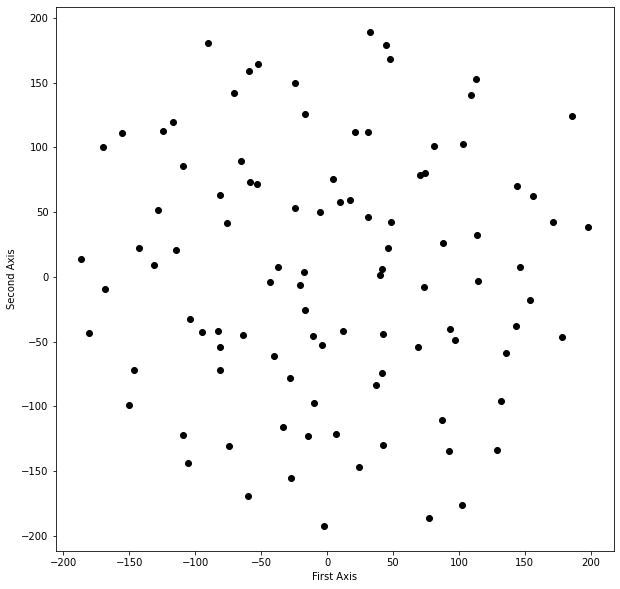

In [24]:
tsne = TSNE(3)
tsne_scale_results = tsne.fit_transform(df_scale)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['one', 'two', 'three'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=1, facecolor='black')
plt.xlabel('First Axis')
plt.ylabel('Second Axis')
plt.show()